# 0. Background

Let's say their's a secret number hidden inside a box and it's represented by n bits. 

We would need n attempts by a classical computer to find out the exact number.

A little explaination on why the classical computer would take n steps, it is due the fact that our oracle takes the input as the number let's say x=0001 and outputs the $\sum _{i=1}^n s_{i}.x_{i}$ mod 2 meaning it takes the sumation over the dot product (bitwise AND) of of the s (the bit string whose structure we're interested to find) and x.

But for Quantum computer using the BV algo it doesn't matter if the bit string is 1 or n bits long it just takes 1 step to find the bit string , in other words it goes over all the possibilities at once.

Assumptions in theory: Oracle implementation are unknown to us(here we would be making it for demonstrating the power of QCs)

Quick video on the idea of BV: https://www.youtube.com/watch?v=DQSoM6RSICA (recommended)

# 1. Importing packages

In [2]:
from qiskit import QuantumCircuit,Aer,execute
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

# 2. Making the circuit

In [3]:
secret_num="101001"

## 2.1 First part of BV

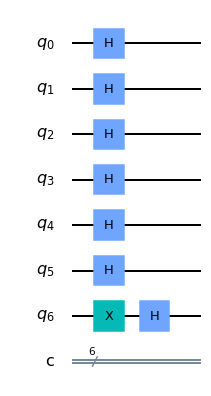

In [7]:
qc=QuantumCircuit(6+1,6) # 6+1 we would be needing n+1 qubits in general
qc.h([0,1,2,3,4,5])
qc.x(6)
qc.h(6)
qc.draw('mpl')

## 2.2 Placing an Oracle  (building the box based on the secret number w choose above)

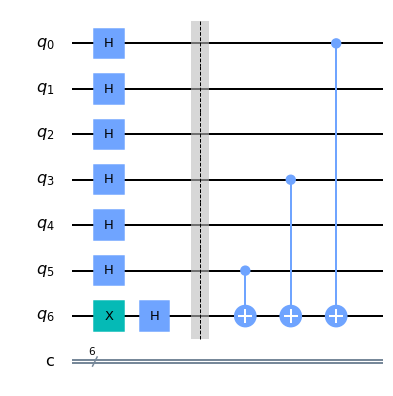

In [8]:
qc.barrier()
qc.cx(5,6)      #cx gate(controlled on our extra qubit) wherever we have a 1 in our secret number
qc.cx(3,6)
qc.cx(0,6)      # also mind the qubit number, it's reverse than what we write
qc.draw('mpl')

## 2.3 Second part of BV

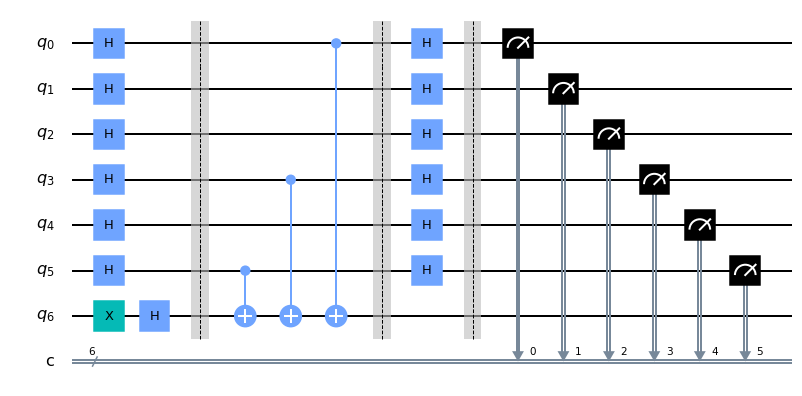

In [9]:
qc.barrier()
qc.h([0,1,2,3,4,5])
qc.barrier()
qc.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
qc.draw('mpl')

## 3. Run the QC

In [10]:
backend=Aer.get_backend('qasm_simulator')
result=execute(qc,backend=backend,shots=1).result()
counts=result.get_counts()

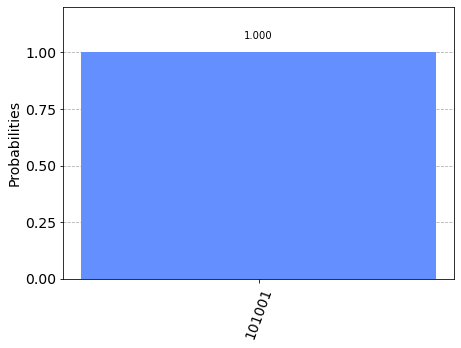

In [11]:
plot_histogram(counts)

The circuit has guessed our secret number in just one shot

## 4. Generalizing the code

We have now Generalized the code for n bits

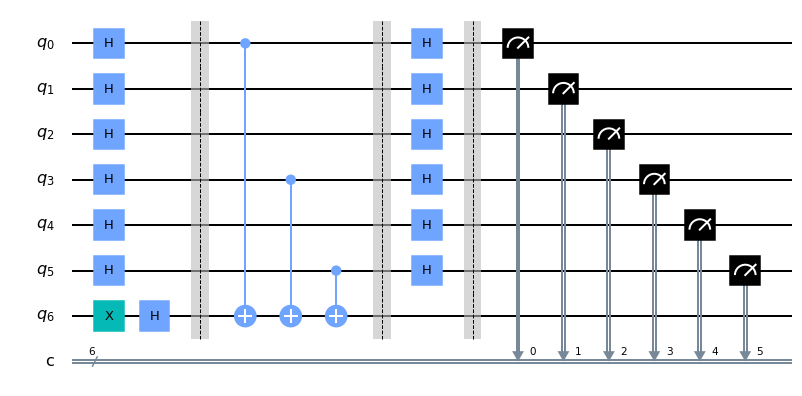

In [14]:
n=len(secret_num)

qc1=QuantumCircuit(n+1,n) 

qc1.h(range(n))
qc1.x(n)
qc1.h(n)

qc1.barrier()

for ii,yesno in enumerate(reversed(secret_num)):
    if yesno=="1":
        qc1.cx(ii,n)
        
qc1.barrier()
qc1.h(range(n))
qc1.barrier()

qc1.measure(range(n),range(n))
qc1.draw('mpl')